## Self Organizing Maps

SOMs are unsupervised models for dimensionality reduction. They maps higher dimension data to 2D to visualise it. 

Nice blog that explains the working: [AI junkie](http://www.ai-junkie.com/ann/som/som1.html)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
print dataset.head()
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(-1, 1)

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


In [10]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [14]:
from minisom import MiniSom
# x and y are the dimension of SOM (rows, columns)
# input_length is the dimensionality of your data
som = MiniSom(x=10, y=10, input_len=15)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

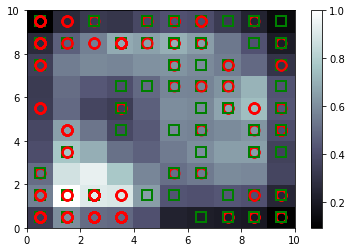

In [37]:
%matplotlib inline

# visualizing SOM
from pylab import bone, pcolor, colorbar, plot, show
# bone will just create a window
bone()
# add the winning nodes
pcolor(som.distance_map().T)
# display legend 
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for indx, row in enumerate(X):
    winning_node = som.winner(row)
    # plot square or circle for the winning node
    # additional 0.5 is for padding
    # markers will be O for 0 and S for 1
    # same with the colors
    plot(winning_node[0] + 0.5, winning_node[1] + 0.5, 
         markers[y[indx][0]], markeredgecolor=colors[y[indx][0]],
         markerfacecolor='None', markersize=10, markeredgewidth=2)

In [36]:
y.shape

(690, 1)